# HOUSE PRICE PREDICTION WITH LINEAR REGRESSION :

<b>Description : </b>The objective of this project is to build a predictive model using linear regression to estimate a
numerical outcome based on a dataset with relevant features. Linear regression is a
fundamental machine learning algorithm, and this project provides hands-on experience in
developing, evaluating, and interpreting a predictive model.


<b>Key Concepts and Challenges:</b></br>

1.) Data Collection: Obtain a dataset with numerical features and a target variable for prediction.</br>
2.) Data Exploration and Cleaning: Explore the dataset to understand its structure, handle
missing values, and ensure data quality.</br>
3.) Feature Selection: Identify relevant features that may contribute to the predictive model.</br>
4.) Model Training: Implement linear regression using a machine learning library (e.g., Scikit-
Learn).</br>
5.) Model Evaluation: Evaluate the model's performance on a separate test dataset using
metrics such as Mean Squared Error or R-squared.</br>
6.) Visualization: Create visualizations to illustrate the relationship between the predicted and
actual values.</br>

### Import Libraries :

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,accuracy_score

### Read the Dataset :

In [3]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.shape

(545, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.dtypes 

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [7]:
df.dtypes.value_counts()

object    7
int64     6
Name: count, dtype: int64

### Data PreProcessing :

##### 1) Detect Null Values & Null_%:

In [8]:
def fetch_null_count_percent(df):
    Null_Count = df.isnull().sum()
    Null_Count = Null_Count[Null_Count > 0]
    nullv_res = pd.DataFrame({'Feature' : Null_Count.index,'Null_Count':Null_Count.values,'Null_Percent':(Null_Count.values/df.shape[0])*100})
    nullv_res = nullv_res.sort_values("Null_Percent", ascending=False)
    return nullv_res

nv_df = fetch_null_count_percent(df)
nv_df

,Feature,Null_Count,Null_Percent


##### 2) Handle Duplicate Rows :

In [9]:
df.duplicated().sum()

0

##### 3) Data Consistency :

In [10]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


##### 4) Seperate Categorical & Numerical Cols :

In [11]:
cat_cols = df.dtypes[df.dtypes=='object'].index
num_cols = df.dtypes[df.dtypes!='object'].index
print('Cat_Cols => ', cat_cols)
print('Num_Cols => ', num_cols)

Cat_Cols =>  Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus'],
      dtype='object')
Num_Cols =>  Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')


### EDA :

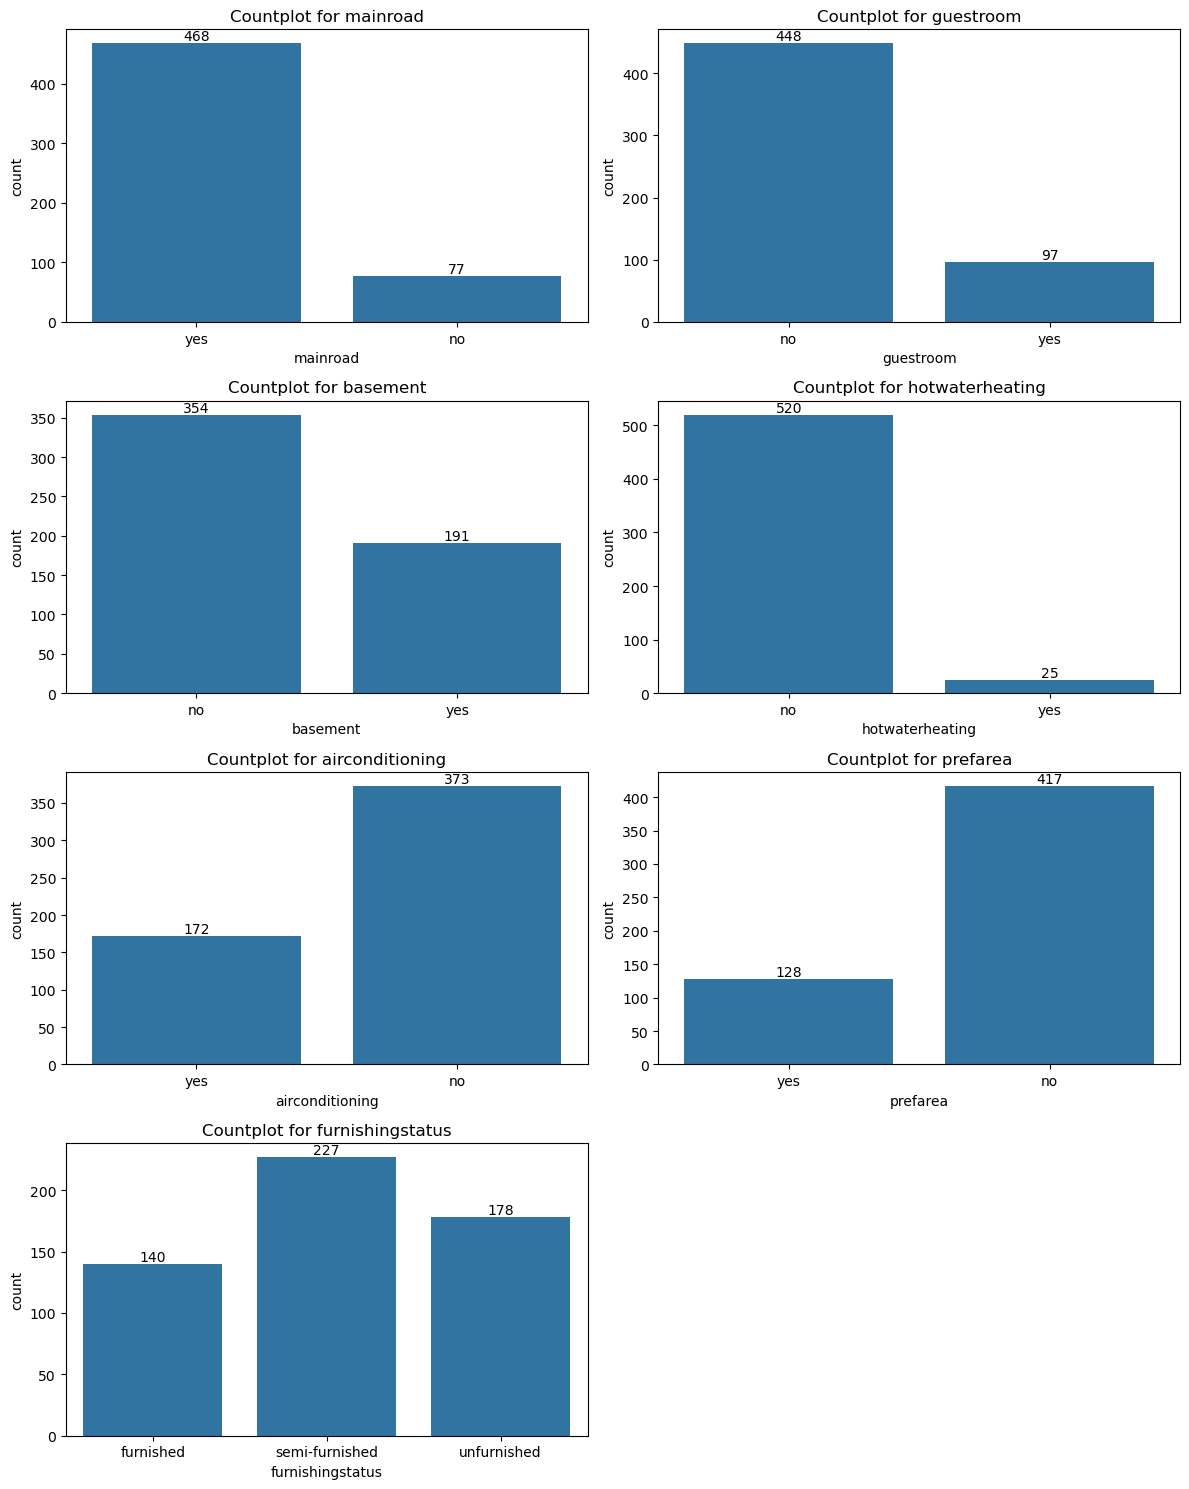

In [12]:
### CATEGORICAL COLUMNS :

plt.figure(figsize=(12,15))
for i in range(len(cat_cols)):
    plt.subplot(4,2,i+1)
    ax = sns.countplot(x=df[cat_cols[i]])
    ax.bar_label(ax.containers[0])
    plt.title(f'Countplot for {cat_cols[i]}')
    plt.tight_layout()
plt.show()

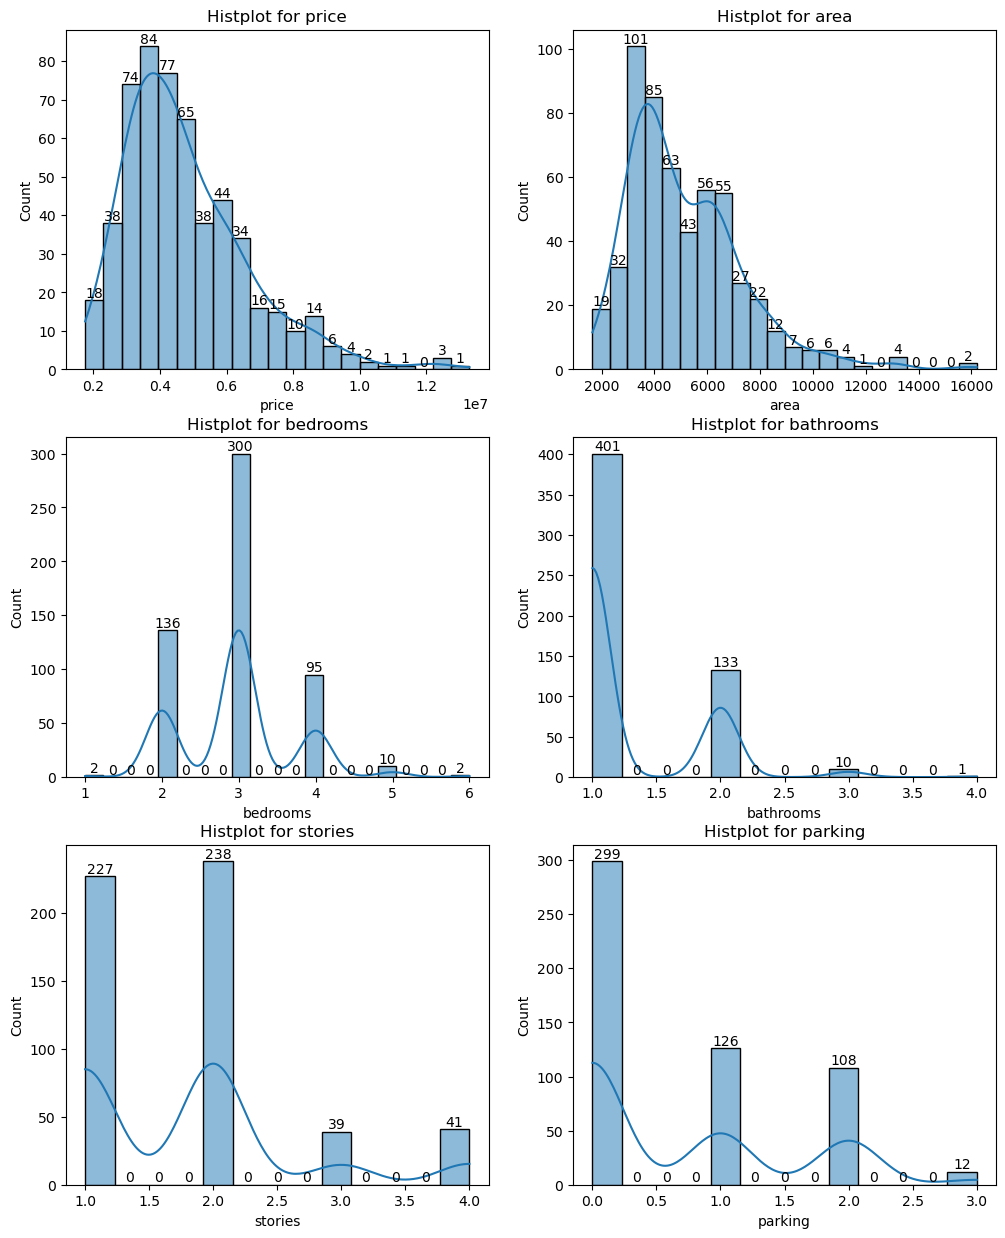

In [13]:
### NUMERICAL COLUMNS :

plt.figure(figsize=(12,15))
for i in range(len(num_cols)):  
    plt.subplot(3,2,i+1)
    ms = sns.histplot(x=df[num_cols[i]],kde=True)
    ms.bar_label(ms.containers[0])
    plt.title(f'Histplot for {num_cols[i]}')
plt.show()

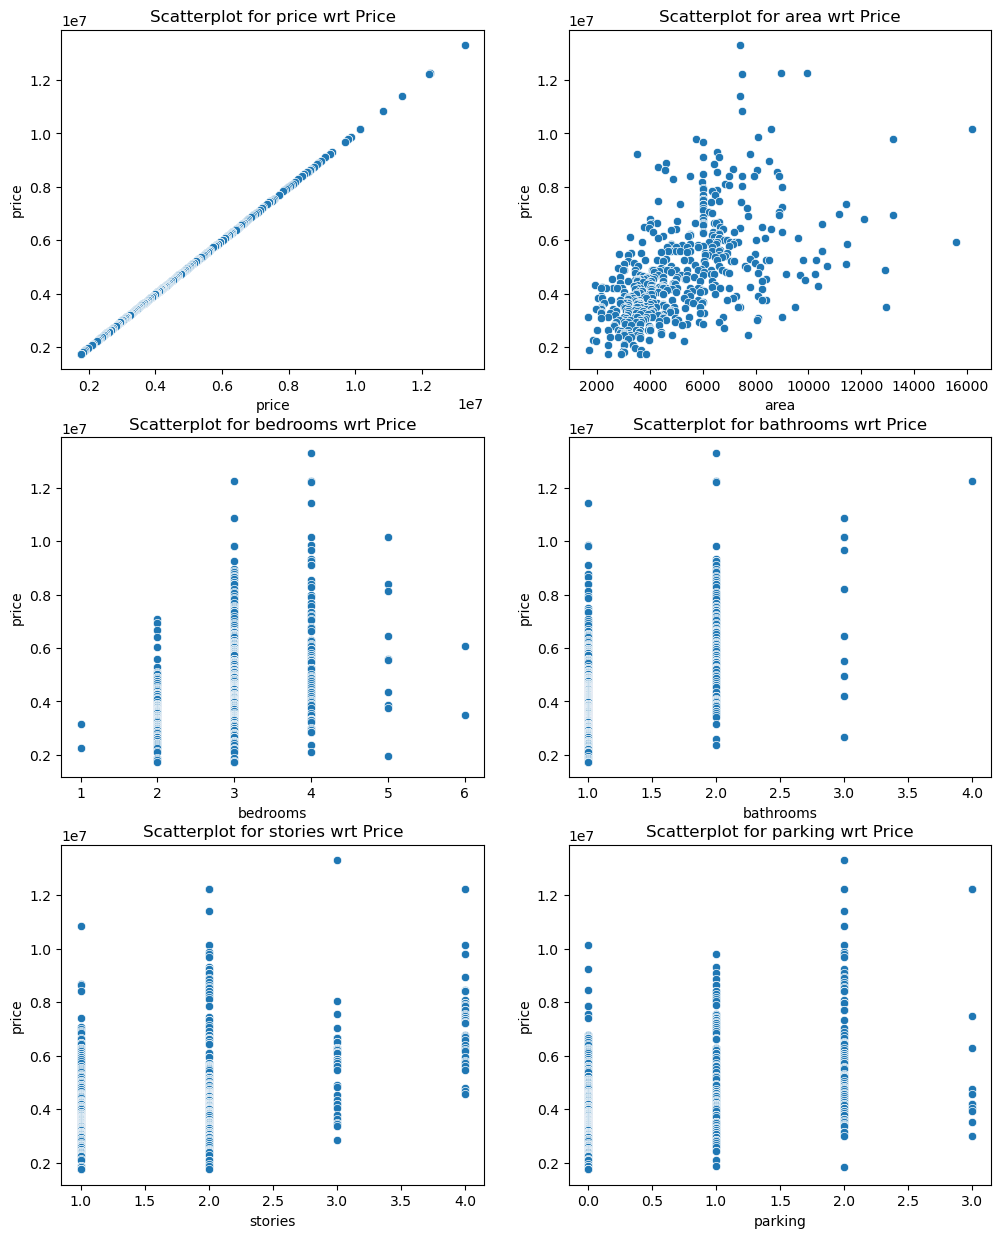

In [14]:
plt.figure(figsize=(12,15))
for i in range(len(num_cols)): 
    plt.subplot(3,2,i+1)
    sns.scatterplot(x=df[num_cols[i]],y=df['price'])
    plt.title(f'Scatterplot for {num_cols[i]} wrt Price')
plt.show()

#### Correlation Analysis :

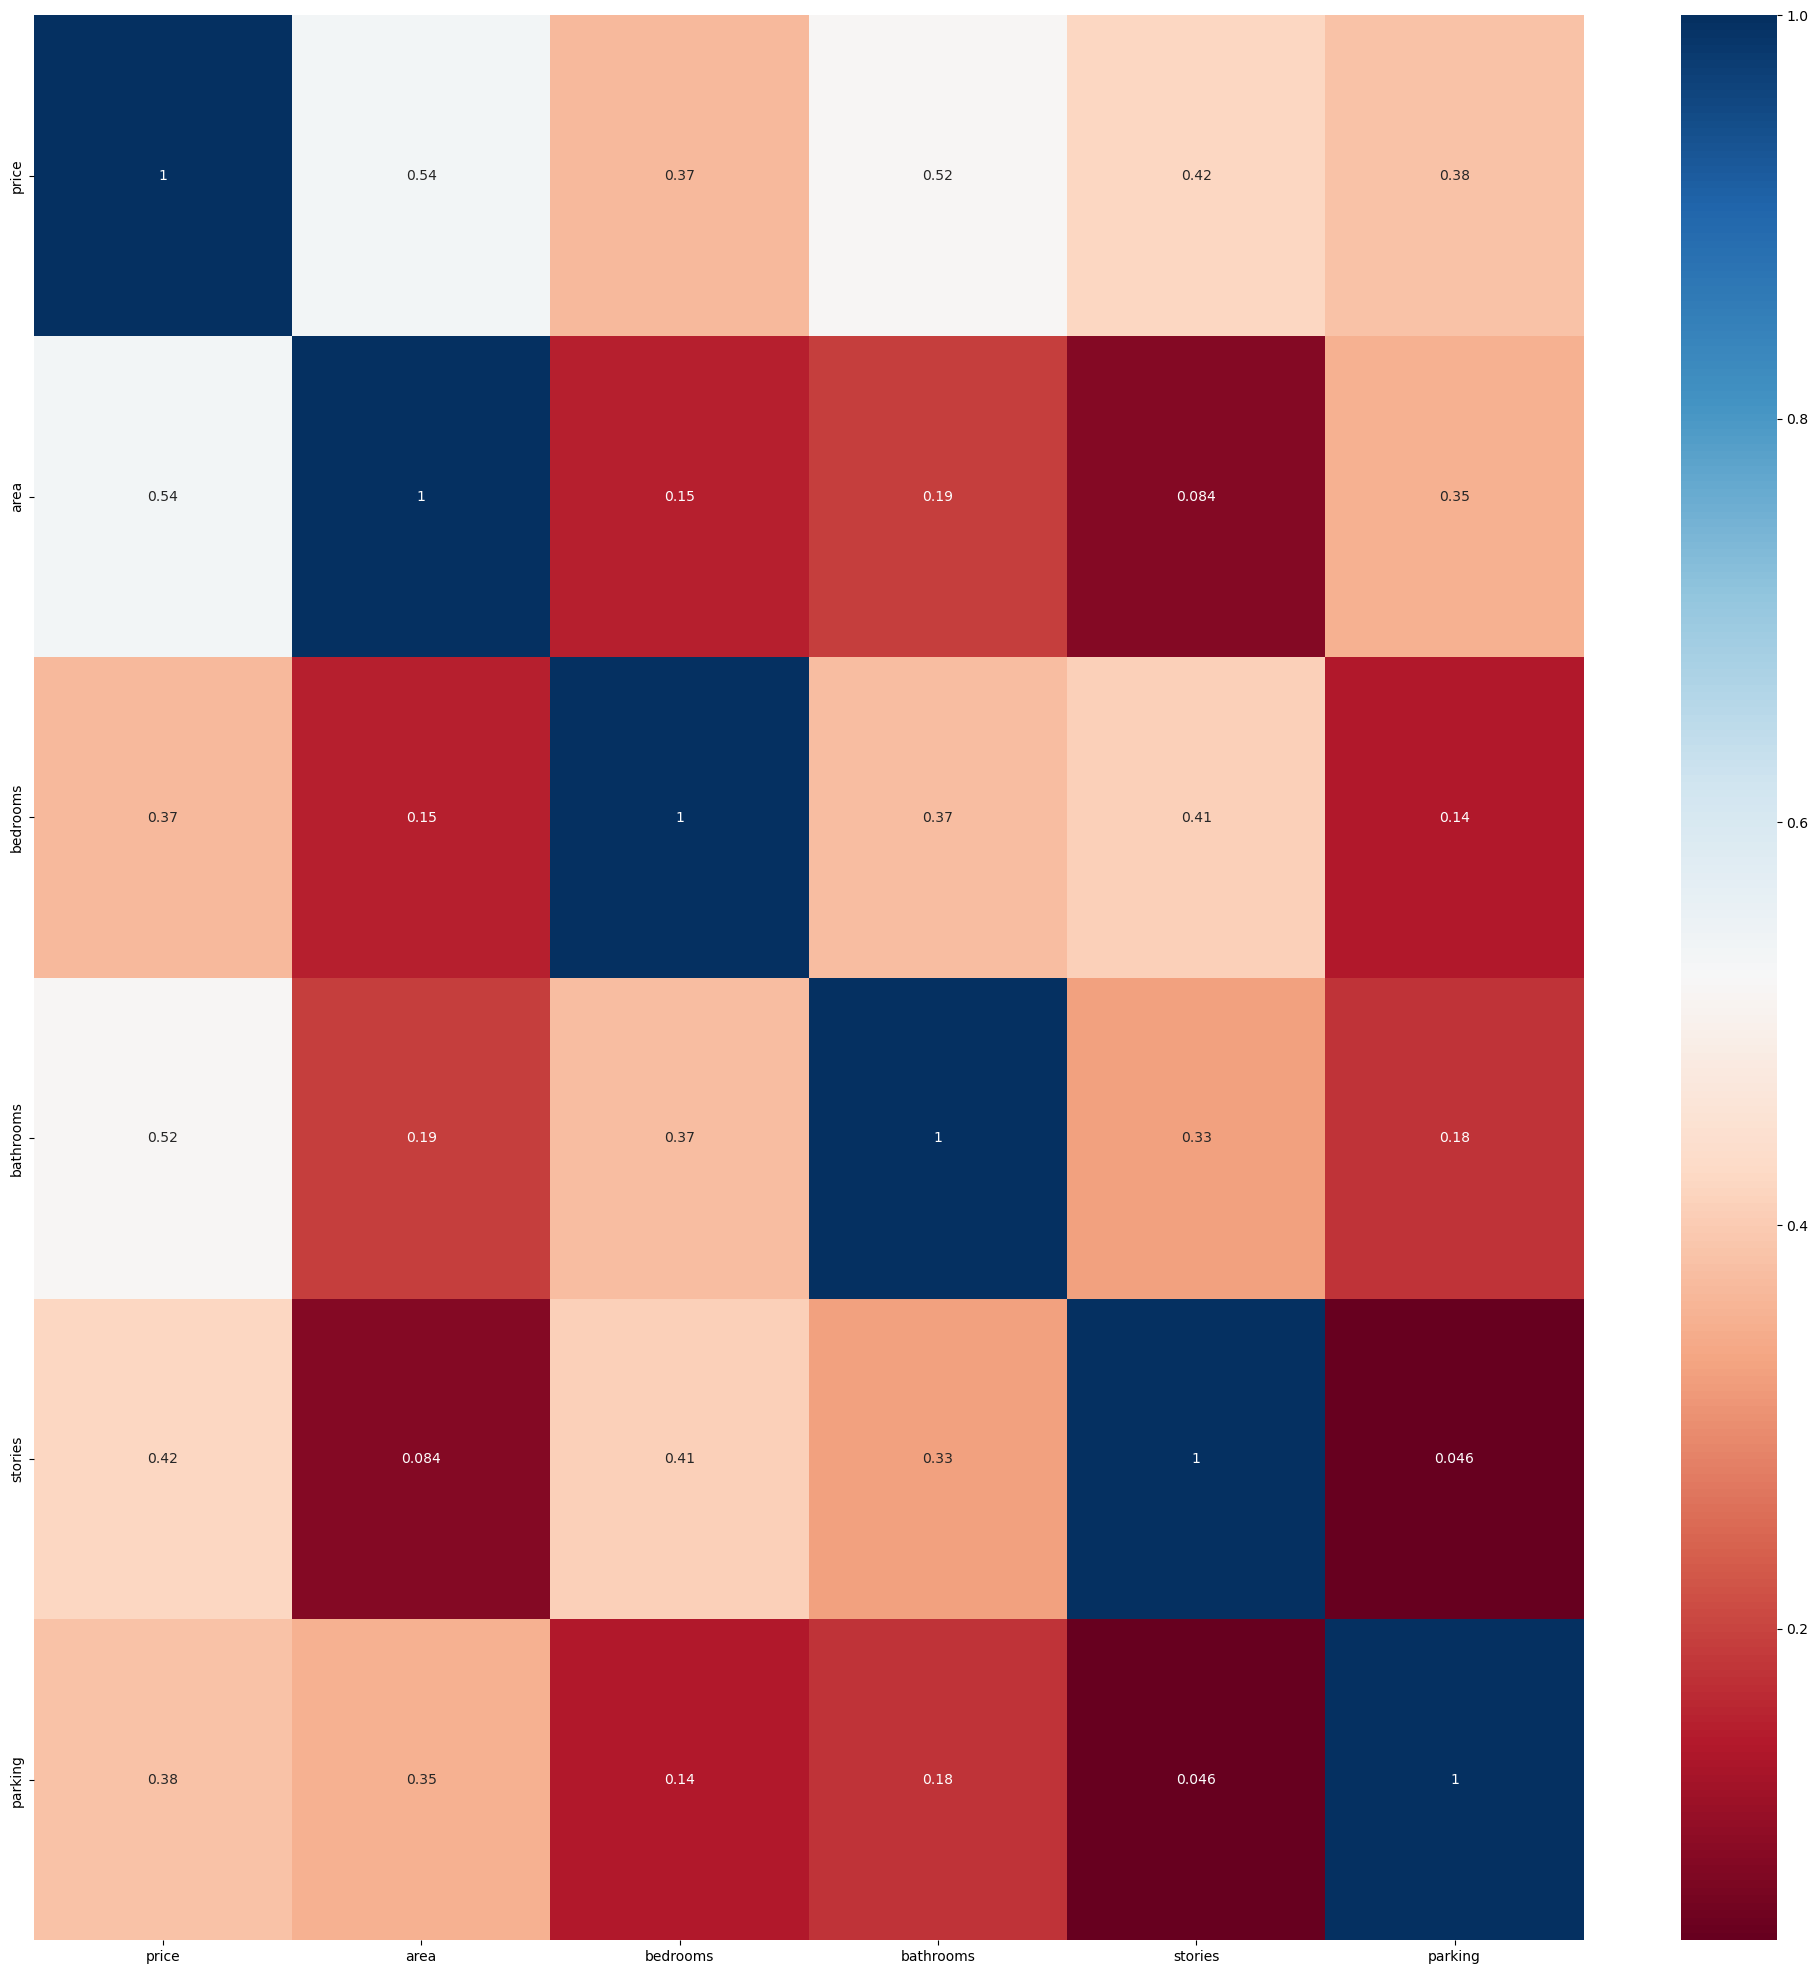

In [15]:
corr = df[num_cols].corr()

plt.figure(figsize=(25,25))
sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()

### Outliers Detect - through BoxPlot.

In [16]:
for i in num_cols:
    print(i,df[i].nunique())

proper_num_feat = [] 
for i in num_cols:
    if df[i].nunique()>6:
        proper_num_feat.append(i)

price 219
area 284
bedrooms 6
bathrooms 4
stories 4
parking 4


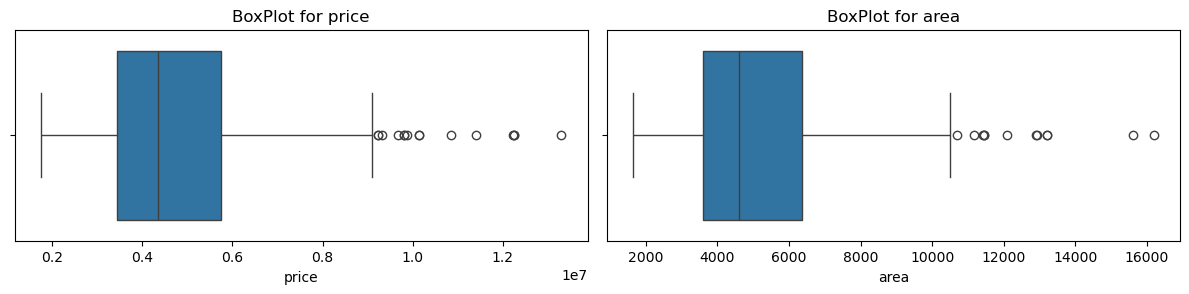

In [17]:
plt.figure(figsize=(12,8))
for i in range(len(proper_num_feat)):
    plt.subplot(3,2,i+1)
    sns.boxplot(x=df[proper_num_feat[i]])
    plt.title(f'BoxPlot for {proper_num_feat[i]}')
    plt.tight_layout()
plt.show()

### Outliers Treatment :

In [18]:
## All the proper_numerical_features percentiles check..[1:] it is used for removing ID column.  ## UPPER END - 95% , LOWER END - 5%

a1 = df[proper_num_feat[:3]].describe(percentiles=[0.01,0.02,0.05,0.95,0.98,0.99]).T                 ## T - Transpose
a1 = a1.iloc[:,3:]
a1

## OUTLIERS CHECK   => MAX column value  -  99% column value   => if difference is more => they are outliers..

,min,1%,2%,5%,50%,95%,98%,99%,max
price,1750000.0,1870400.0,2100000.0,2450000.0,4340000.0,8400000.0,9695280.0,10542000.0,13300000.0
area,1650.0,1972.0,2145.0,2562.0,4600.0,9000.0,10757.0,12543.6,16200.0


In [19]:
## Cols_right_skewed => difference between Maximum and 99% columns values..
cols_right_skewed = ['price', 'area']

## Cols_left_skewed => difference between Minimum and 1% columns values..
cols_left_skewed = ['price', 'area']

In [20]:
df1 = df.copy()

In [21]:
for i in cols_right_skewed:                       ## Upper end Outlier (max column value) to be treated (filled) with the value of 0.99 (99%)..
    upper = df[i].quantile(0.99)
    df[i] = np.where(df[i]>upper,upper,df[i])

In [22]:
for i in cols_left_skewed:                       ## Lower end Outlier (min column value) to be treated (filled) with the value of 0.01 (1%)..
    lower = df[i].quantile(0.01)
    df[i] = np.where(df[i]<lower,lower,df[i])

In [23]:
a1 = df[proper_num_feat[:3]].describe(percentiles=[0.01,0.02,0.05,0.95,0.98,0.99]).T                 ## T - Transpose
a1 = a1.iloc[:,3:]
a1

,min,1%,2%,5%,50%,95%,98%,99%,max
price,1870400.0,1879024.00,2100000.0,2450000.0,4340000.0,8400000.0,9695280.0,1.036952e+07,10542000.0
area,1972.0,1984.32,2145.0,2562.0,4600.0,9000.0,10757.0,1.234402e+04,12543.6


### Feature Encoding :

In [24]:
for i in cat_cols:
    print(i)
    print(df[i].value_counts())

mainroad
mainroad
yes    468
no      77
Name: count, dtype: int64
guestroom
guestroom
no     448
yes     97
Name: count, dtype: int64
basement
basement
no     354
yes    191
Name: count, dtype: int64
hotwaterheating
hotwaterheating
no     520
yes     25
Name: count, dtype: int64
airconditioning
airconditioning
no     373
yes    172
Name: count, dtype: int64
prefarea
prefarea
no     417
yes    128
Name: count, dtype: int64
furnishingstatus
furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64


In [25]:
encoder = LabelEncoder()

encoding_col = ['furnishingstatus','prefarea','airconditioning','hotwaterheating','basement','guestroom','mainroad']
for i in encoding_col:
    df[i]=encoder.fit_transform(df[i])                                 ### Yes = 1 , No = 0

In [26]:
df.head()                      

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,10542000.0,7420.0,4,2,3,1,0,0,0,1,2,1,0
1,10542000.0,8960.0,4,4,4,1,0,0,0,1,3,0,0
2,10542000.0,9960.0,3,2,2,1,0,1,0,0,2,1,1
3,10542000.0,7500.0,4,2,2,1,0,1,0,1,3,1,0
4,10542000.0,7420.0,4,1,2,1,1,1,0,1,2,0,0


In [27]:
df['furnishingstatus'].value_counts()             ## Unfurnished = 1  ,   Semifurnished = 2 ,  Furnished = 0

furnishingstatus
1    227
2    178
0    140
Name: count, dtype: int64

In [28]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

### Select x and y

x = independent feature<br>
y = dependent feature

In [29]:
x=df.drop(columns=['price','mainroad','guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'],axis = 1)
y=df['price']

print(x.shape)
print(y.shape)

(545, 5)
(545,)


### ORDINARY LEAST SQUARE METHOD {OLS}:

In [30]:
import statsmodels.api as sm

In [31]:
x1 = x.copy()
y1 = y.copy()

In [32]:
x1 = sm.add_constant(x1)                   ## to generate intercept (c).. in y = mx + c
ols_m1 = sm.OLS(y1,x1).fit()
ols_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     141.3
Date:                Wed, 08 Jan 2025   Prob (F-statistic):           1.33e-95
Time:                        19:48:37   Log-Likelihood:                -8396.8
No. Observations:                 545   AIC:                         1.681e+04
Df Residuals:                     539   BIC:                         1.683e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.001e+05   2.39e+05     -0.419      0.675   -5.69e+05    3.69e+05
area         339.7367     26.453     12.843      0.000     287.773     391.700
bedrooms    1.714e+05   7.96e+04      2.153      0.032     1.5e+04    3.28e+05
bathrooms   1.088e+06   1.14e+05      9.536      0.000    8.64e+05    1.31e+06
stories     5.336e+05   6.62e+04      8.064      0.000    4.04e+05    6.64e+05
parking     3.395e+05   6.44e+04      5.273      0.000    2.13e+05    4.66e+05
==============================================================================
Omnibus:                       31.795   Durbin-Watson:                   1.102
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.451
Skew:                           0.467   Prob(JB):                     1.35e-10
Kurtosis:                       4.062   Cond. No.                     2.66e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.66e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
print('OLS_M1')
print('R2',ols_m1.rsquared)
print('Adj_R2',ols_m1.rsquared_adj)

OLS_M1
R2 0.5672542808245733
Adj_R2 0.5632399420567122


#### Model Training : Split Data into Train and Test

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=57)   # random_state = defines particular or same splitting orders.

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(381, 5)
(164, 5)
(381,)
(164,)


In [35]:
def eval_model(ytest, ypred):
    MAE = mean_absolute_error(ytest,ypred)         
    MSE = mean_squared_error(ytest,ypred)          
    RMSE = np.sqrt(MSE)                             
    r2 = r2_score(ytest, ypred)                     
    print('MAE: ',MAE)
    print('MSE: ',MSE)
    print('RMSE: ',RMSE)
    print('Test_R2: ', r2)

### LINEAR REGRESSION :

In [36]:
lr1 = LinearRegression()
lr1.fit(x_train, y_train)

LinearRegression()

In [37]:
y_pred = lr1.predict(x_test)

eval_model(y_test,y_pred)

MAE:  880525.3868264576
MSE:  1451237564536.5977
RMSE:  1204673.2189837198
Test_R2:  0.5889971182816436


In [38]:
ln_acc = r2_score(y_test, y_pred)
ln_acc

0.5889971182816436

In [39]:
print('Train Score',lr1.score(x_train,y_train))          ## Train R2_Score
print('Test Score',lr1.score(x_test,y_test))             ## Test R2_Score

Train Score 0.5535027122637401
Test Score 0.5889971182816436


### DECISION TREE :

In [40]:
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train, y_train)

DecisionTreeRegressor()

In [41]:
y_pred = dt_model.predict(x_test)

In [42]:
dt_acc = r2_score(y_test, y_pred)
dt_acc

0.33958541885439275

### RANDOM FOREST REGRESSOR :

In [43]:
rf_model = RandomForestRegressor(n_estimators=100,criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1)
rf_model.fit(x_train,y_train)

RandomForestRegressor()

In [44]:
y_pred = rf_model.predict(x_test)

In [45]:
rf_acc = r2_score(y_test, y_pred)
rf_acc

0.48935099985731934

### MODEL BASED VISUALISATION :

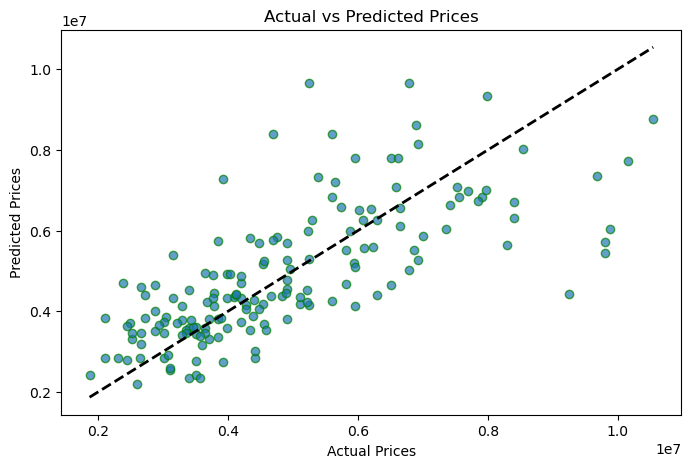

In [46]:
## Plotting the Relationship Between Actual and Predicted Prices :

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolor='green')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.plot([y.min(), y.max()],[y.min(), y.max()], 'k--', lw=2)
plt.show()

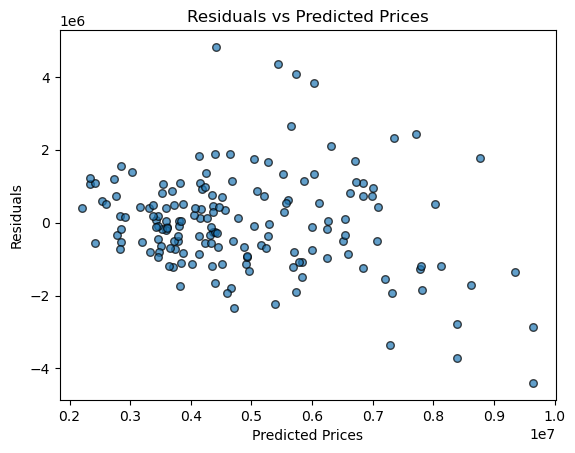

In [47]:
## Residuals Vs Predicted_Prices :

residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.7, edgecolor='black', s=30)
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Prices')
plt.show()

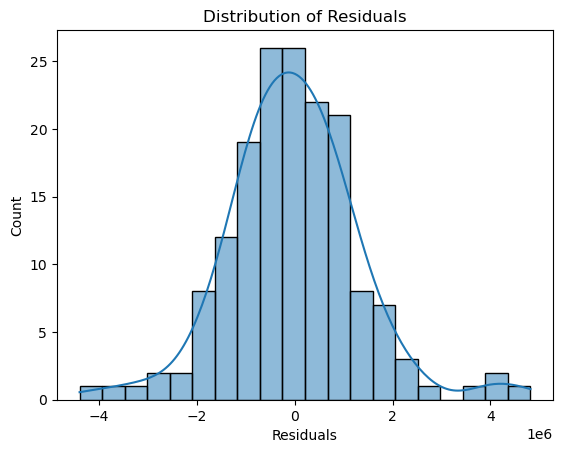

In [48]:
## Distribution of Residuals :

sns.histplot(residuals, kde=True, bins=20)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

### Conclusion :

The model demonstrates some predictive ability but may not be perfectly accurate due to the spread around the regression line.</br>
<b>Key Insights:</b></br>
•	Consistency of Predictions: The alignment around the diagonal regression line suggests the model is fairly good at predicting house prices, but variability (spread) indicates room for improvement.</br>
•	Feature Impact: The insights from correlation coefficients or the model's coefficient values could guide which features have the strongest influence on house prices. 
For instance: High correlation values for features like square footage, location, or number of rooms would suggest focusing on optimizing these for better pricing strategies.
